In [1]:
# Import relevant items
import pandas as pd
import numpy as np

import seaborn as sns
%matplotlib inline


In [2]:
foo = r'E:/RESEAERCH/FEEDS/Makerere/feeds.csv'

In [3]:
# Let's first load the data and take a look at what we have.
df = pd.read_csv(foo)

In [4]:
print(df.head())

   Hour              Date      Value
0     1  2017/09/04 06:00   9.562500
1     2  2017/09/04 07:00   8.341000
2     3  2017/09/04 08:00   6.484444
3     4  2017/09/29 10:00  13.416000
4     5  2017/09/29 11:00  11.840000


In [5]:
(df.columns)

Index([u'Hour', u'Date', u'Value'], dtype='object')

In [6]:
df = df.drop(df[df.Value == 500].index)

In [7]:
import matplotlib.pyplot as plt
plt.style.use('ggplot')
plt.rcParams["figure.figsize"] = [16,8]

In [9]:
df = df.drop(['field1','field3','field4','field5','field6','field7'], axis=1)

In [10]:
df.head()

,Hour,Date,Value
0,1,2017/09/04 06:00,9.562500
1,2,2017/09/04 07:00,8.341000
2,3,2017/09/04 08:00,6.484444
3,4,2017/09/29 10:00,13.416000
4,5,2017/09/29 11:00,11.840000


In [11]:
 df.describe()

,Hour,Value
count,1758.000000,1758.000000
mean,880.489192,10.414330
std,507.653736,12.084547
min,1.000000,0.645000
25%,441.250000,3.384201
50%,880.500000,6.993846
75%,1319.750000,13.627682
max,1759.000000,146.414375


In [12]:
print df['Value'].median()
print df['Value'].var()
print df['Value'].skew()
print df['Value'].kurt()

6.993846154
146.036273157
3.92556552875
24.2186373613


In [13]:
from datetime import datetime
df['Date'] = pd.to_datetime(df['Date'])
#df['created_at'] = pd.to_datetime(df['created_at'])
#df = df.rename(columns={"created_at": "Date"})
#df = df.rename(columns={"field2": "Value"})

In [14]:
df.head()

,Hour,Date,Value
0,1,2017-09-04 06:00:00,9.562500
1,2,2017-09-04 07:00:00,8.341000
2,3,2017-09-04 08:00:00,6.484444
3,4,2017-09-29 10:00:00,13.416000
4,5,2017-09-29 11:00:00,11.840000


Incidentally now that we have a properly formatted Date field we can plot a time series of PM2.5 values over the entire dataset. Considering the length of time this may be messy, but let's give it a go.

In [23]:
def time_series(start, end):
    time_series_df = df[['Date', 'Value']][(df['Date'] >= start) & (df['Date'] <= end)]
    x = time_series_df.Date
    y = time_series_df.Value
    plt.plot(x,y)
    plt.xlabel('Time')
    plt.ylabel('PM2.5 Value')
    plt.title('PM2.5 Time Series')
    return plt.show();

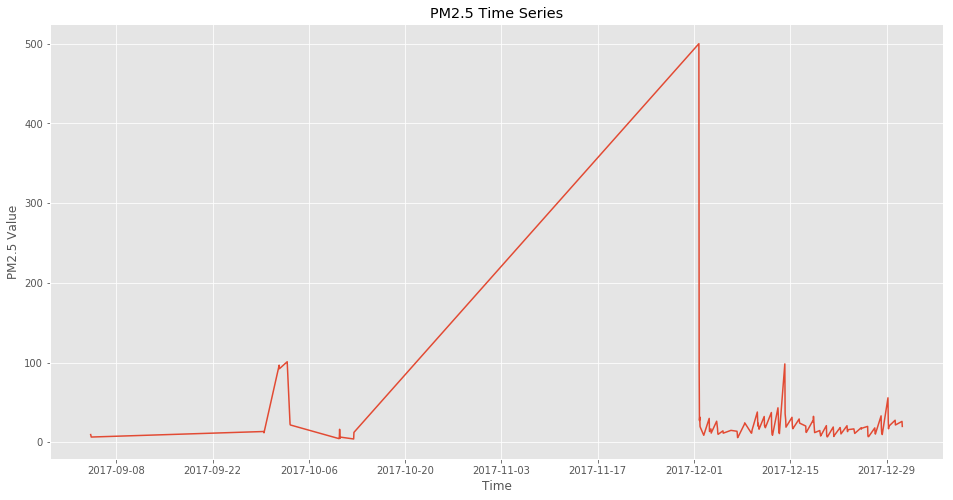

In [24]:
time_series('2017','2018')

In [15]:
df = df.drop(df[df.Value <= 0.62].index)

In [18]:
df.describe()

,entry_id,Value
count,66595.000000,6.659500e+04
mean,34158.471642,2.450537e+22
std,19928.434345,6.323858e+24
min,1.000000,6.300000e-01
25%,17157.500000,3.420000e+00
50%,33807.000000,6.700000e+00
75%,50455.500000,1.230000e+01
max,69892.000000,1.631935e+27


In [19]:
df.Value.max()

1.6319352999999995e+27

In [20]:
df = df.drop(df[df.Value > 1000].index)

In [21]:
 df.describe()

,entry_id,Value
count,66594.000000,66594.000000
mean,34158.725816,9.356559
std,19928.476027,11.410892
min,1.000000,0.630000
25%,17157.250000,3.420000
50%,33807.500000,6.700000
75%,50455.750000,12.300000
max,69892.000000,680.190000


In [26]:
#df=df.replace(df['Value'] >500, 500)
#replace values over 550 with 505
df.Value = np.where(df.Value >500, 500,df.Value)

In [25]:
def time_series(start, end):
    time_series_df = df[['Date', 'Value']][(df['Date'] >= start) & (df['Date'] <= end)]
    x = time_series_df.Date
    y = time_series_df.Value
    plt.plot(x,y)
    plt.xlabel('Time')
    plt.ylabel('PM2.5 Value')
    plt.title('PM2.5 Time Series')
    return plt.show();

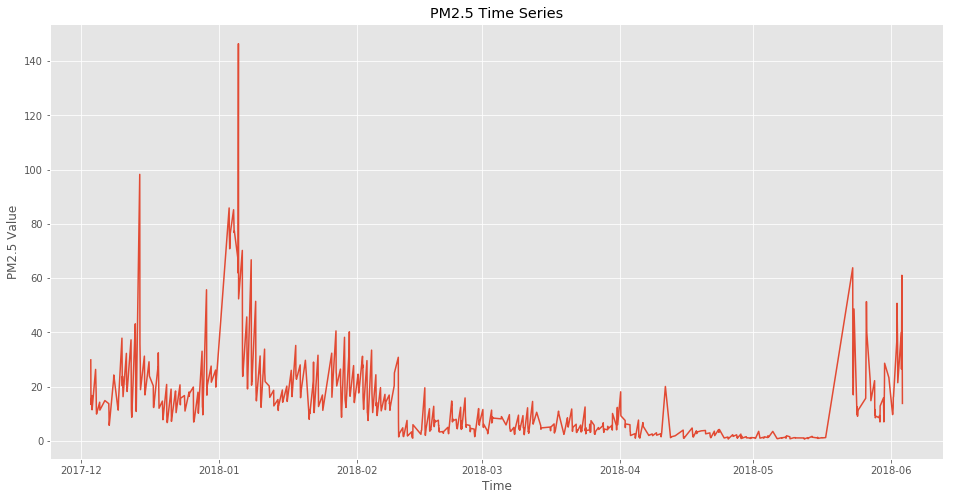

In [28]:
time_series('2017-12-03','2018-06-05')

In [29]:
# Are there null values in our dataset?
df.isnull().values.any()

False

In [30]:
# Show rows where any cell has a NaN
df[df.isnull().any(axis=1)].shape

(0, 3)

In [11]:
foo = r'E:/RESEAERCH/FEEDS/Makerere/feedsD.csv'
# Let's first load the data and take a look at what we have.
df = pd.read_csv(foo)
print(df.head())


   Day        Date       Value
0    1  2017/01/10   94.412778
1    2  2017/01/12  114.506929
2    3  2017/02/10  100.947143
3    4  2017/02/12    8.682500
4    5  2017/03/10   22.144143


In [12]:
 from datetime import datetime

df['Date'] = pd.to_datetime(df['Date'])

In [13]:

daily = df.set_index('Date').groupby(pd.Grouper(freq='D'))['Value'].mean()
monthly = daily.groupby(pd.Grouper(freq='D')).mean()
#Dropping all Nan values
monthlys = monthly.dropna(axis=0)
print monthlys.head()
print monthlys.shape

Date
2017-01-10     94.412778
2017-01-12    114.506929
2017-02-10    100.947143
2017-02-12      8.682500
2017-03-10     22.144143
Name: Value, dtype: float64
(238,)


In [49]:
#monthlys.to_csv('E:/RESEAERCH/FEEDS/Makerere/feedsD.csv',index = True)

In [14]:
#Create day of the week feature
import datetime as dt

df['day_week'] = df['Date'].dt.weekday_name

In [15]:
df.head()

,Day,Date,Value,day_week
0,1,2017-01-10,94.412778,Tuesday
1,2,2017-01-12,114.506929,Thursday
2,3,2017-02-10,100.947143,Friday
3,4,2017-02-12,8.682500,Sunday
4,5,2017-03-10,22.144143,Friday


In [16]:
df['month'] = df['Date'].dt.month_name()

In [17]:
df.head()

,Day,Date,Value,day_week,month
0,1,2017-01-10,94.412778,Tuesday,January
1,2,2017-01-12,114.506929,Thursday,January
2,3,2017-02-10,100.947143,Friday,February
3,4,2017-02-12,8.682500,Sunday,February
4,5,2017-03-10,22.144143,Friday,March


In [18]:
df['month_cat'] = df.month.astype("category").cat.codes

In [19]:
df.head()

,Day,Date,Value,day_week,month,month_cat
0,1,2017-01-10,94.412778,Tuesday,January,4
1,2,2017-01-12,114.506929,Thursday,January,4
2,3,2017-02-10,100.947143,Friday,February,3
3,4,2017-02-12,8.682500,Sunday,February,3
4,5,2017-03-10,22.144143,Friday,March,7


In [20]:
df = df.drop(df[df.Value >= 500].index)

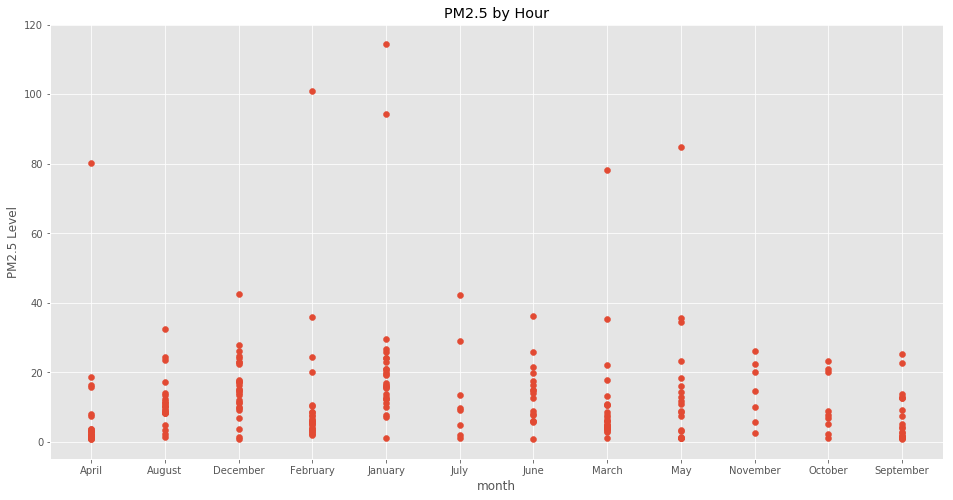

In [21]:
x = df['month']
y = df['Value']
plt.scatter(x,y)
plt.xlabel('month')
plt.ylabel('PM2.5 Level')
plt.title('PM2.5 by Hour')
plt.show()

In [22]:
loadx = df[['Value', 'month']].groupby(['month']).mean()

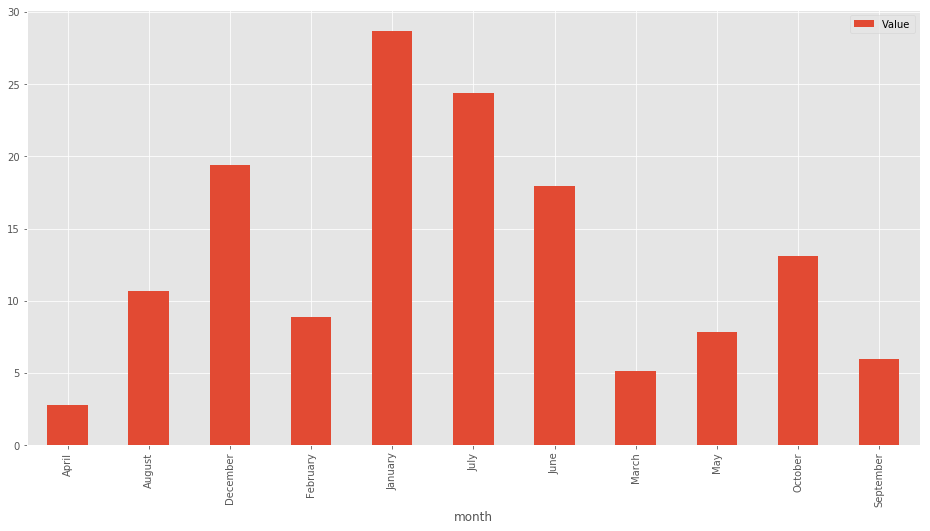

In [49]:
loadx.plot(kind='bar')
 

In [23]:
# For our purposes hazardous is hazardous, no need to apply a different category.
labels = ['Good','Moderate','Unhealthy for Sensitive','Unhealthy','Very Unhealthy','Hazardous']
df['EPA_Level'] = pd.cut(df['Value'],[-50,12,35.4,55.4,150.4,250.4,1000],labels=labels)

In [24]:
loadx = df[['Value', 'EPA_Level']].groupby(['EPA_Level']).median()

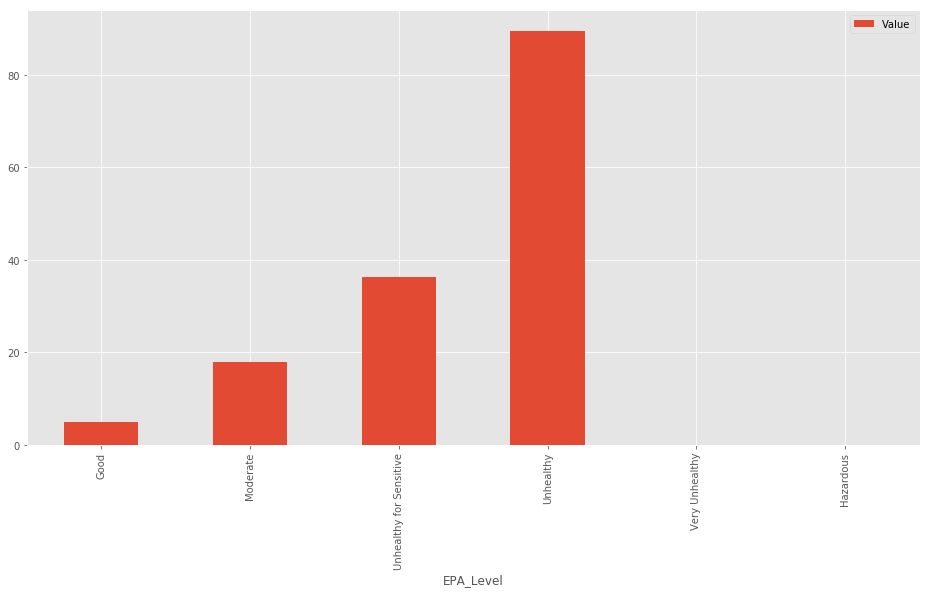

In [25]:
loadx.plot(kind='bar')
 

In [18]:
df.count()

Day          238
Date         238
Value        238
day_week     238
month        238
month_cat    238
EPA_Level    238
dtype: int64

In [51]:
df.describe()

,Hour,Value,month_cat
count,1758.000000,1758.000000,1758.000000
mean,880.489192,10.414330,5.455063
std,507.653736,12.084547,3.744391
min,1.000000,0.645000,0.000000
25%,441.250000,3.384201,2.000000
50%,880.500000,6.993846,6.000000
75%,1319.750000,13.627682,10.000000
max,1759.000000,146.414375,10.000000


In [52]:
df = df.drop(['Date','EPA_Level'], axis=1)
df.columns

Index([u'Hour', u'Value', u'day_week', u'month', u'month_cat'], dtype='object')

In [19]:
df.head()

,Day,Date,Value,day_week,month,month_cat,EPA_Level
0,1,2017-10-01,94.412778,Sunday,October,9,Unhealthy
1,2,2017-12-01,114.506929,Friday,December,2,Unhealthy
2,3,2017-10-02,100.947143,Monday,October,9,Unhealthy
3,4,2017-12-02,8.682500,Saturday,December,2,Good
4,5,2017-10-03,22.144143,Tuesday,October,9,Moderate


In [54]:
df = df.drop(['day_week','month'], axis=1)

In [55]:
df.head()

,Hour,Value,month_cat
0,1,9.562500,10
1,2,8.341000,10
2,3,6.484444,10
3,4,13.416000,10
4,5,11.840000,10


# Training and testing 

In [56]:
y = df['Value']

In [57]:
X = df.drop(['Value'], axis=1)

In [58]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, random_state=1234)

In [59]:
X_train.shape, y_train.shape

((1230, 2), (1230,))

In [60]:
X_test.shape, y_test.shape

((528, 2), (528,))

# Linear Regression

In [71]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Create linear regression object
regr = LinearRegression()

In [72]:
# Train the model using the training sets
regr.fit(X_train, y_train)

# Make predictions using the testing set
lin_pred = regr.predict(X_test)

linear_regression_score = regr.score(X_test, y_test)
linear_regression_score

0.1127236536418136

In [73]:
from math import sqrt
# The coefficients
print('Coefficients: \n', regr.coef_)
# The mean squared error
print("Root mean squared error: %.2f"
      % sqrt(mean_squared_error(y_test, lin_pred)))
# The absolute squared error
print("Mean absolute error: %.2f"
      % mean_absolute_error(y_test, lin_pred))
# Explained variance score: 1 is perfect prediction
print('R-squared: %.2f' % r2_score(y_test, lin_pred))

('Coefficients: \n', array([-0.00822102,  0.07012198]))
Root mean squared error: 12.03
Mean absolute error: 7.14
R-squared: 0.11


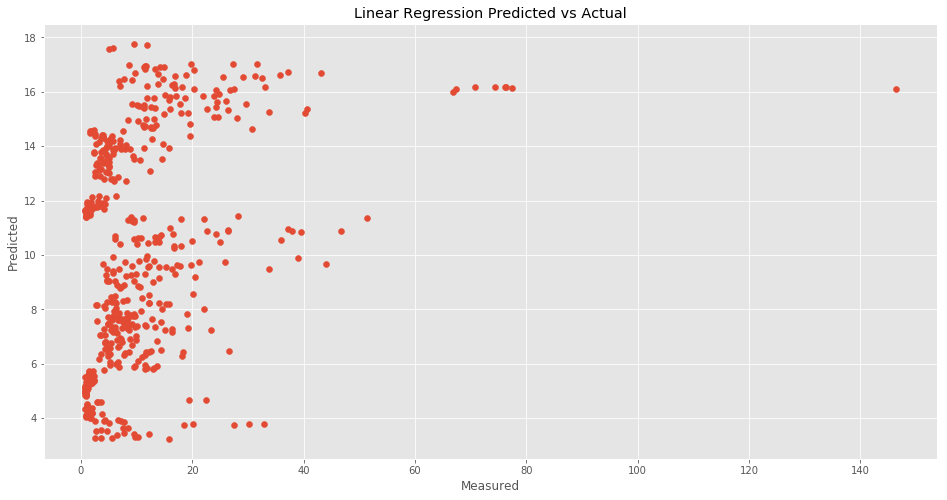

In [74]:
plt.scatter(y_test, lin_pred)
plt.xlabel('Measured')
plt.ylabel('Predicted')
plt.title('Linear Regression Predicted vs Actual')
plt.show()

# Neural Network Regression

In [75]:
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Create MLPRegressor object
#mlp = GaussianProcessRegressor()
mlp = MLPRegressor()

In [76]:
# Train the model using the training sets
mlp.fit(X_train, y_train)

MLPRegressor(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(100,), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=None,
       shuffle=True, solver='adam', tol=0.0001, validation_fraction=0.1,
       verbose=False, warm_start=False)

In [77]:
# Score the model
neural_network_regression_score = mlp.score(X_test, y_test)
neural_network_regression_score

0.014244284073167688

In [78]:
# Make predictions using the testing set
nnr_pred = mlp.predict(X_test)

In [79]:
# The mean squared error
print("Root mean squared error: %.2f"
      % sqrt(mean_squared_error(y_test, nnr_pred)))
# The absolute squared error
print("Mean absolute error: %.2f"
      % mean_absolute_error(y_test, nnr_pred))
# Explained variance score: 1 is perfect prediction
print('R-squared: %.2f' % r2_score(y_test, nnr_pred))

Root mean squared error: 12.68
Mean absolute error: 7.27
R-squared: 0.01


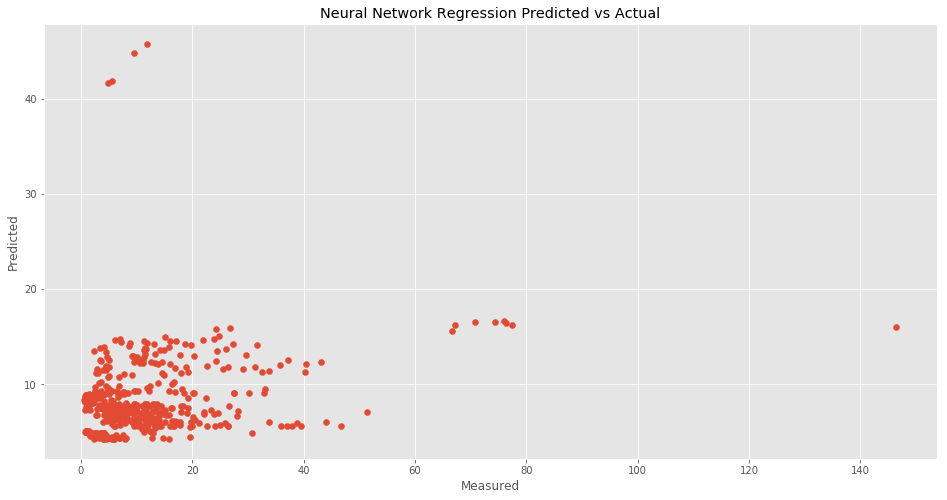

In [80]:
plt.scatter(y_test, nnr_pred)
plt.xlabel('Measured')
plt.ylabel('Predicted')
plt.title('Neural Network Regression Predicted vs Actual')
plt.show()

# Gaussian Process Regressor

In [81]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn import model_selection

# Create MLPRegressor object
gpr = GaussianProcessRegressor()

In [82]:
# Train the model using the training sets
gpr.fit(X_train, y_train)

GaussianProcessRegressor(alpha=1e-10, copy_X_train=True, kernel=None,
             n_restarts_optimizer=0, normalize_y=False,
             optimizer='fmin_l_bfgs_b', random_state=None)

In [83]:
# Score the model
GP_regression_score = gpr.score(X_test, y_test)
GP_regression_score

0.34857035261267211

In [84]:
# Make predictions using the testing set
gpr_pred = gpr.predict(X_test)

In [85]:
# The mean squared error
print("Root mean squared error: %.2f"
      % sqrt(mean_squared_error(y_test, gpr_pred)))
# The absolute squared error
print("Mean absolute error: %.2f"
      % mean_absolute_error(y_test, gpr_pred))
# Explained variance score: 1 is perfect prediction
print('R-squared: %.2f' % r2_score(y_test, gpr_pred))

Root mean squared error: 10.31
Mean absolute error: 5.26
R-squared: 0.35


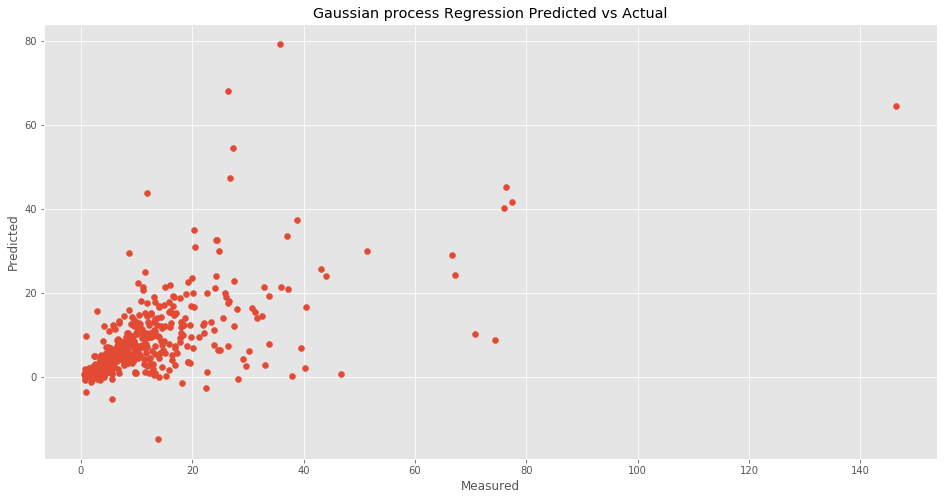

In [86]:
plt.scatter(y_test, gpr_pred)
plt.xlabel('Measured')
plt.ylabel('Predicted')
plt.title('Gaussian process Regression Predicted vs Actual')
plt.show()

# Lasso

In [87]:
from sklearn.linear_model import Lasso

lasso = Lasso()

In [88]:
lasso.fit(X_train, y_train)

Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)

In [89]:
# Score the model
lasso_score = lasso.score(X_test, y_test)
lasso_score

0.11234050598045964

In [90]:
# Make predictions using the testing set
lasso_pred = lasso.predict(X_test)

In [91]:
print("Root mean squared error: %.2f"
      % sqrt(mean_squared_error(y_test, lasso_pred)))

Root mean squared error: 12.03


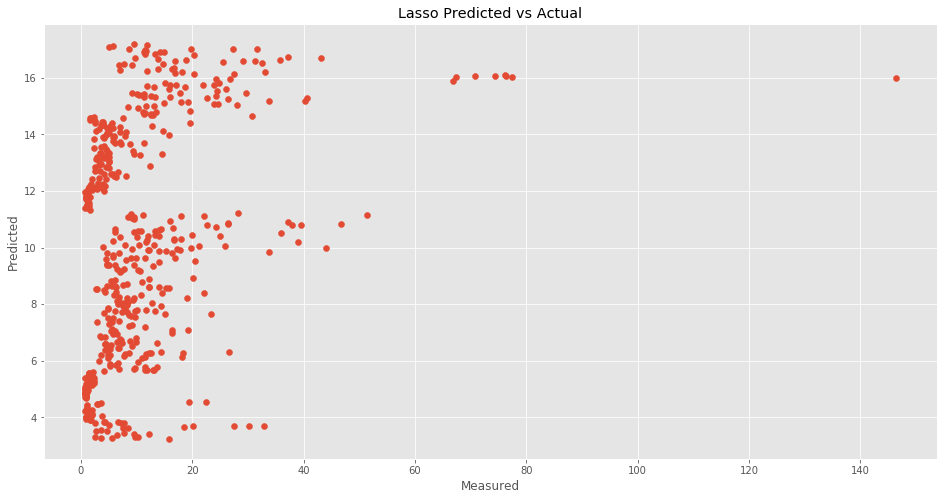

In [92]:
plt.scatter(y_test, lasso_pred)
plt.xlabel('Measured')
plt.ylabel('Predicted')
plt.title('Lasso Predicted vs Actual')
plt.show()

# Random Forest Regressor

In [93]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score


# Create Random Forrest Regressor object
regr_rf = RandomForestRegressor(n_estimators=200, random_state=1234)

In [94]:
# Train the model using the training sets
regr_rf.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=200, n_jobs=1,
           oob_score=False, random_state=1234, verbose=0, warm_start=False)

In [95]:
# Score the model
decision_forest_score = regr_rf.score(X_test, y_test)
decision_forest_score

0.69890207191052811

In [96]:
# Make predictions using the testing set
regr_rf_pred = regr_rf.predict(X_test)

In [97]:
# The mean squared error
print("Root mean squared error: %.2f"
      % sqrt(mean_squared_error(y_test, regr_rf_pred)))
# The absolute squared error
print("Mean absolute error: %.2f"
      % mean_absolute_error(y_test, regr_rf_pred))
# Explained variance score: 1 is perfect prediction
print('R-squared: %.2f' % r2_score(y_test, regr_rf_pred))

Root mean squared error: 7.01
Mean absolute error: 3.46
R-squared: 0.70


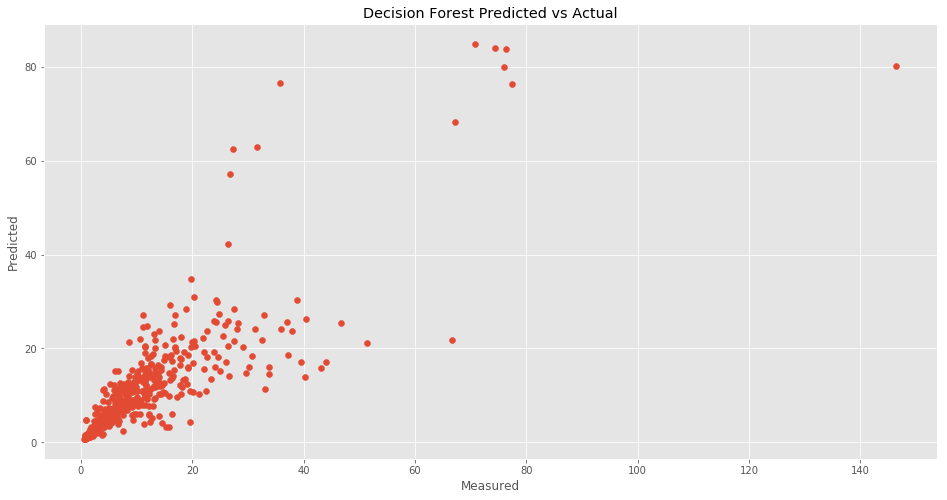

In [98]:
plt.scatter(y_test, regr_rf_pred)
plt.xlabel('Measured')
plt.ylabel('Predicted')
plt.title('Decision Forest Predicted vs Actual')
plt.show()

# Extra Trees Regression

In [99]:
from sklearn.ensemble import ExtraTreesRegressor

extra_tree = ExtraTreesRegressor(n_estimators=200, random_state=1234)

In [100]:
extra_tree.fit(X_train, y_train)

ExtraTreesRegressor(bootstrap=False, criterion='mse', max_depth=None,
          max_features='auto', max_leaf_nodes=None,
          min_impurity_decrease=0.0, min_impurity_split=None,
          min_samples_leaf=1, min_samples_split=2,
          min_weight_fraction_leaf=0.0, n_estimators=200, n_jobs=1,
          oob_score=False, random_state=1234, verbose=0, warm_start=False)

In [101]:
extratree_score = extra_tree.score(X_test, y_test)
extratree_score

0.71275395578046874

In [102]:
extratree_pred = extra_tree.predict(X_test)

In [103]:
print("Root mean squared error: %.2f"
      % sqrt(mean_squared_error(y_test, extratree_pred)))

Root mean squared error: 6.84


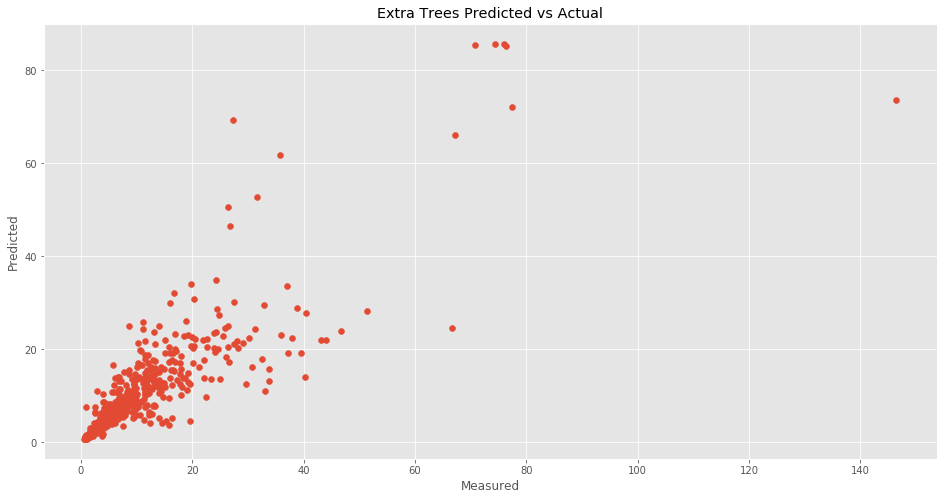

In [104]:
plt.scatter(y_test, extratree_pred)
plt.xlabel('Measured')
plt.ylabel('Predicted')
plt.title('Extra Trees Predicted vs Actual')
plt.show()

# XGBoost

In [105]:
from xgboost.sklearn import XGBRegressor

#Fitting XGB regressor 
xboost = XGBRegressor(n_estimators=200)

In [106]:
xboost.fit(X_train, y_train)

XGBRegressor(base_score=0.5, colsample_bylevel=1, colsample_bytree=1, gamma=0,
       learning_rate=0.1, max_delta_step=0, max_depth=3,
       min_child_weight=1, missing=None, n_estimators=200, nthread=-1,
       objective='reg:linear', reg_alpha=0, reg_lambda=1,
       scale_pos_weight=1, seed=0, silent=True, subsample=1)

In [107]:
xgb_score = xboost.score(X_test, y_test)
xgb_score

0.58428545269485865

In [108]:
#Predict 
xboost_pred = xboost.predict(X_test)

In [109]:
from math import sqrt
print("Root mean squared error: %.2f"
      % sqrt(mean_squared_error(y_test, xboost_pred)))

Root mean squared error: 8.23


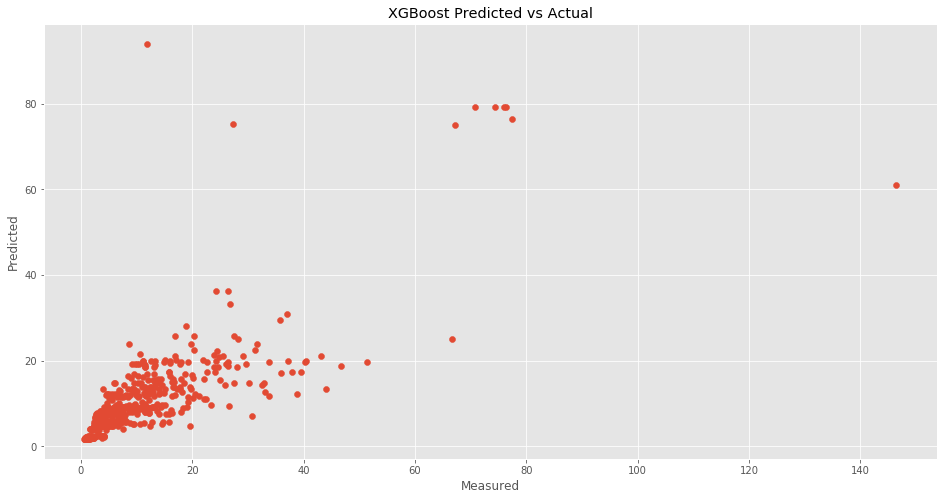

In [110]:
plt.scatter(y_test, xboost_pred)
plt.xlabel('Measured')
plt.ylabel('Predicted')
plt.title('XGBoost Predicted vs Actual')
plt.show()

# Decision Tree + AdaBoost

In [113]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Create Decision Tree Regressor object
tree_1 = DecisionTreeRegressor()

tree_2 = AdaBoostRegressor(DecisionTreeRegressor(), n_estimators=200, learning_rate=.1)

In [117]:
# Make predictions using the testing set
tree_1_pred = tree_1.predict(X_test)
tree_2_pred = tree_2.predict(X_test)

In [114]:
# Train the model using the training sets
tree_1.fit(X_train, y_train)
tree_2.fit(X_train, y_train)

AdaBoostRegressor(base_estimator=DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best'),
         learning_rate=0.1, loss='linear', n_estimators=200,
         random_state=None)

In [115]:
# Score the decision tree model
tree_1.score(X_test, y_test)

0.57730371843348183

In [116]:
# Score the boosted decision tree model
boosted_tree_score = tree_2.score(X_test, y_test)
boosted_tree_score

0.57843375069458991

In [118]:
# The coefficients
print('Coefficients: \n', regr.coef_)
# The mean squared error
print("Root mean squared error: %.2f"
      % sqrt(mean_squared_error(y_test, tree_2_pred)))
# The absolute squared error
print("Mean absolute error: %.2f"
      % mean_absolute_error(y_test, tree_2_pred))
# Explained variance score: 1 is perfect prediction
print('R-squared: %.2f' % r2_score(y_test, tree_2_pred))

('Coefficients: \n', array([-0.00822102,  0.07012198]))
Root mean squared error: 8.29
Mean absolute error: 3.89
R-squared: 0.58


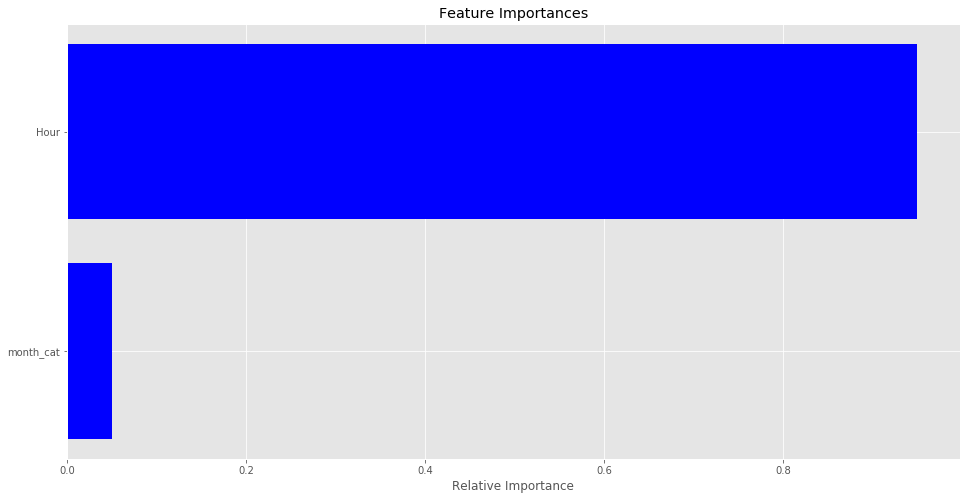

In [119]:
features = X.columns
importances = tree_2.feature_importances_
indices = np.argsort(importances)

plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), features[indices])
plt.xlabel('Relative Importance')
plt.show()

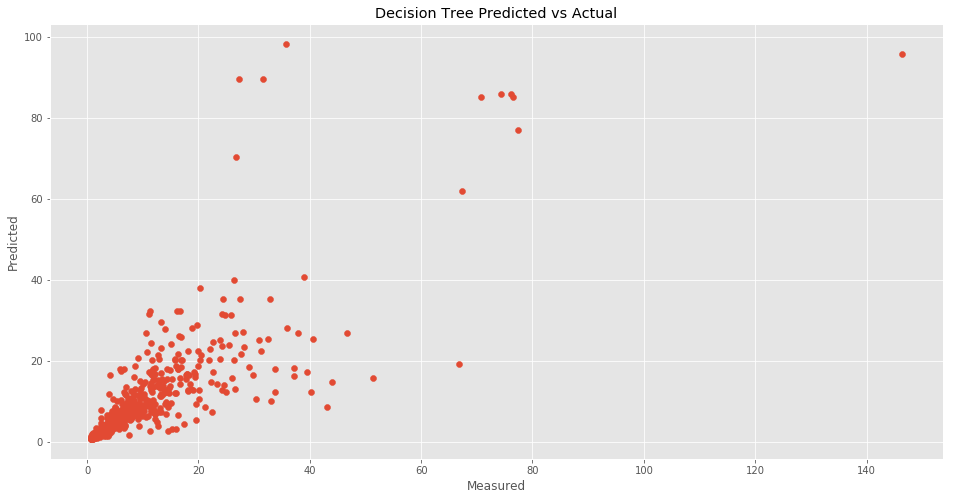

In [120]:
plt.scatter(y_test, tree_1_pred)
plt.xlabel('Measured')
plt.ylabel('Predicted')
plt.title('Decision Tree Predicted vs Actual')
plt.show()

# Evaluate Models

In [139]:
print("Regression models:")
print("Linear regression score: ", linear_regression_score)
print ("Gaussian  Regression process", GP_regression_score)
print ("Neural Network Regression",neural_network_regression_score)
print ("Lasso regression", lasso_score)
print ("RandomForestRegressor", decision_forest_score)
print ("XGBoost", xgb_score)
print ("boosted_tree", boosted_tree_score)

Regression models:
('Linear regression score: ', 0.1127236536418136)
('Gaussian  Regression process', 0.34857035261267211)
('Neural Network Regression', 0.014244284073167688)
('Lasso regression', 0.11234050598045964)
('RandomForestRegressor', 0.69890207191052811)
('XGBoost', 0.58428545269485865)
('boosted_tree', 0.57843375069458991)


In [143]:
 #Using numpy to read the data
data1 = np.genfromtxt(foo,  delimiter=',', skip_header=1)
#print data1
yy = data1[:,[2]]
xx = data1[:,[0]]
print x

[[  1.00000000e+00]
 [  2.00000000e+00]
 [  3.00000000e+00]
 ..., 
 [  1.75700000e+03]
 [  1.75800000e+03]
 [  1.75900000e+03]]


In [144]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(xx, yy, test_size=0.2, random_state=123)

In [146]:
xboost.fit(X_train, y_train)

XGBRegressor(base_score=0.5, colsample_bylevel=1, colsample_bytree=1, gamma=0,
       learning_rate=0.1, max_delta_step=0, max_depth=3,
       min_child_weight=1, missing=None, n_estimators=200, nthread=-1,
       objective='reg:linear', reg_alpha=0, reg_lambda=1,
       scale_pos_weight=1, seed=0, silent=True, subsample=1)

In [167]:
#Predict 
y_pred = xboost.predict(X_test)

In [173]:
#X_ = np.linspace(xx.min(), xx.max() + 5, 50)[:, np.newaxis]
#y_pred, y_std = xboost.predict(X_, return_std=True)
#print y_pred
#print y_std 
X_ = np.linspace(x.min(), x.max() + 25, 500)[:, np.newaxis]
y_pred = xboost.predict(X_)

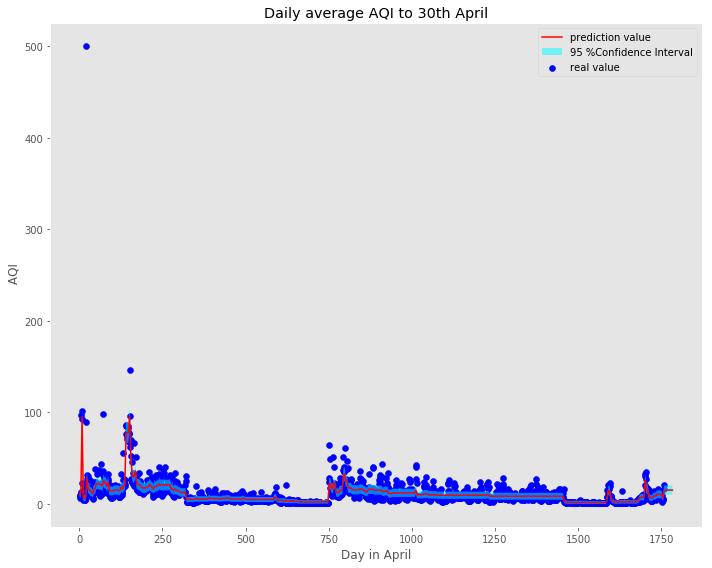

In [179]:
 # Illustration
fig, ax = plt.subplots(figsize=(10,8))

plt.scatter(xx, yy, c='b', label = 'real value')

plt.plot(X_, y_pred, 'r-', label='prediction value')

myne="95 %Confidence Interval"
sigma = np.sqrt(y_pred)
plt.fill(np.concatenate([X_, X_[::-1]]),
         np.concatenate([y_pred - 1.3 * sigma,
                        (y_pred + 1.3 * sigma)[::-1]]),
                         alpha=.5, fc='Cyan', ec='None',label=myne)


#plt.xlim(1750, 1765)
#plt.ylim(-5,200)
plt.xlabel("Day in April")
plt.ylabel(r" AQI")
plt.title(r"Daily average AQI to 30th April")
plt.tight_layout()
#plt.legend(loc=2)
plt.legend()
plt.grid()
plt.show()